# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [2]:
orders = pd.read_csv("C:/Users/Ankita Mall/Downloads/orders.csv")
products = pd.read_csv("C:/Users/Ankita Mall/Downloads/products.csv")
departments = pd.read_csv("C:/Users/Ankita Mall/Downloads/departments.csv")
aisles = pd.read_csv("C:/Users/Ankita Mall/Downloads/aisles.csv")


# Data Understanding

In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
orders.shape

(3421083, 7)

In [8]:
products.shape

(49688, 4)

In [9]:
departments.shape

(21, 2)

In [10]:
aisles.shape

(134, 2)

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [14]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [15]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [16]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [17]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [18]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [19]:
orders['order_id'].duplicated().sum()


0

In [20]:
products['product_id'].duplicated().sum()

0

In [21]:
departments.duplicated().sum()

0

# Data Merging & Handling large data using Dask

In [22]:
# Product info
products_full = products.merge(aisles, on='aisle_id').merge(departments, on='department_id')

In [23]:
# for large file-- pandas(memory error)
import dask.dataframe as dd

In [24]:
# Step 1: Use Dask to load only big files
orders = dd.read_csv("C:/Users/Ankita Mall/Downloads/orders.csv")
order_products_prior = dd.read_csv("C:/Users/Ankita Mall/Downloads/order_products__prior.csv")

In [25]:
# Step 2: Use Dask to do the merge (faster + memory-efficient)
merged = order_products_prior.merge(orders, on='order_id', how='inner')

In [26]:
# Take a subset of merged result, and convert to pandas
subset = merged.head(100_000)

In [27]:
# Step 4: Continue using pandas for further analysis
subset = pd.DataFrame(subset)

In [28]:
final_df = subset.merge(products_full, on='product_id', how='left')


# Data Cleaning

In [29]:
final_df.shape

(100000, 15)

In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                100000 non-null  int64  
 1   product_id              100000 non-null  int64  
 2   add_to_cart_order       100000 non-null  int64  
 3   reordered               100000 non-null  int64  
 4   user_id                 100000 non-null  int64  
 5   eval_set                100000 non-null  string 
 6   order_number            100000 non-null  int64  
 7   order_dow               100000 non-null  int64  
 8   order_hour_of_day       100000 non-null  int64  
 9   days_since_prior_order  93759 non-null   float64
 10  product_name            100000 non-null  object 
 11  aisle_id                100000 non-null  int64  
 12  department_id           100000 non-null  int64  
 13  aisle                   100000 non-null  object 
 14  department           

In [31]:
final_df.isnull().sum()

order_id                     0
product_id                   0
add_to_cart_order            0
reordered                    0
user_id                      0
eval_set                     0
order_number                 0
order_dow                    0
order_hour_of_day            0
days_since_prior_order    6241
product_name                 0
aisle_id                     0
department_id                0
aisle                        0
department                   0
dtype: int64

In [32]:
final_df.duplicated().sum()

0

In [33]:
final_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


# EDA

In [34]:
# Total no. of unique user
final_df['user_id'].nunique()

9463

In [35]:
# Total no. of Product ID
final_df['product_id'].nunique()

16319

In [36]:
# Total no. of unique product
final_df['product_name'].nunique()

16319

In [37]:
# Total no. of order placed
final_df['order_id'].nunique()

9966

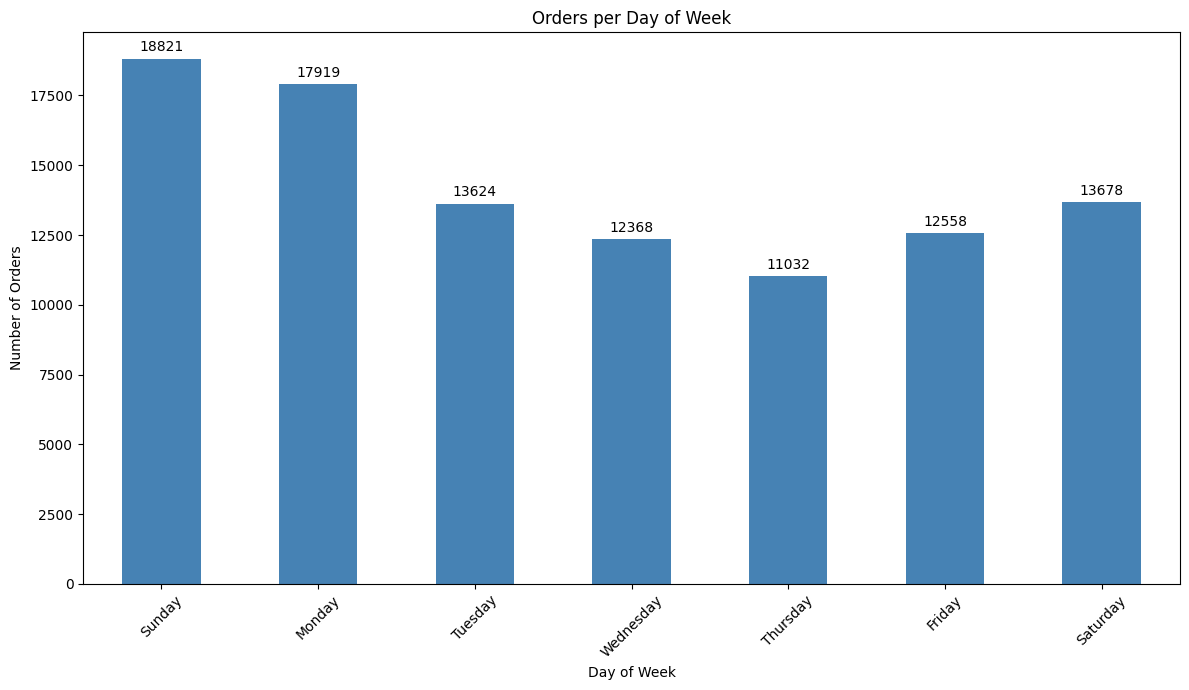

In [38]:
#  When do people usually order? (day of week)

# Map numeric day to weekday name
day_labels = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Get order counts per day, sorted by index
order_counts = final_df['order_dow'].value_counts().sort_index()
order_counts.index = order_counts.index.map(day_labels)

# Plot with solid blue color
plt.figure(figsize=(12, 7))
ax = order_counts.plot(kind='bar', color='steelblue')  # or color='blue'

# Add exact values on top of bars
ax.bar_label(ax.containers[0], padding=3, fontsize=10)

plt.title('Orders per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



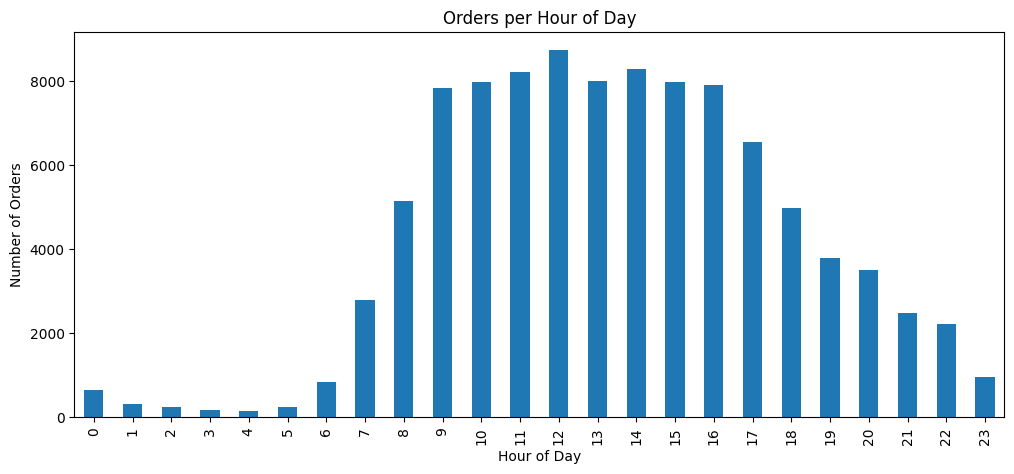

In [39]:
#  When do people usually order? (hour of day)
plt.figure(figsize=(12,5))
final_df['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.title('Orders per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()


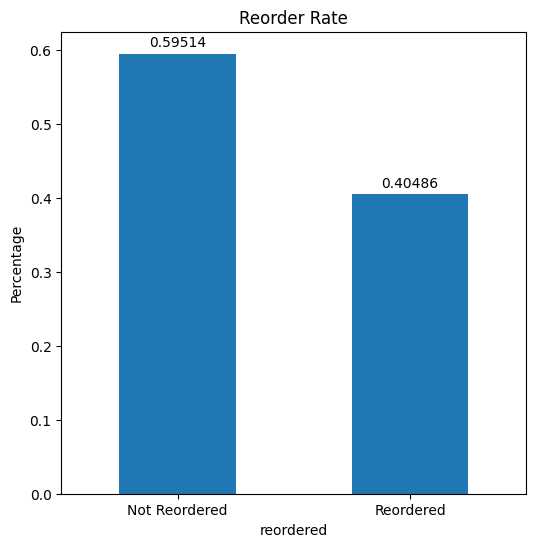

In [40]:
# How often do users reorder products?
plt.figure(figsize = (6,6))
ax = final_df['reordered'].value_counts(normalize=True).plot(kind='bar')
ax.bar_label(ax.containers[0], padding=3, fontsize=10)
plt.title('Reorder Rate')
plt.xticks([0, 1], ['Not Reordered', 'Reordered'], rotation=0)
plt.ylabel('Percentage')
plt.show()


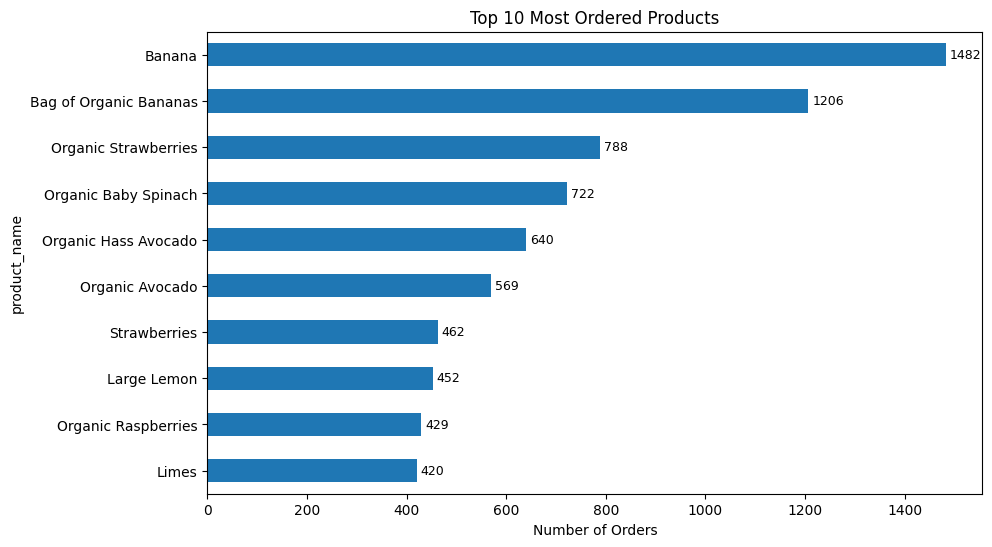

In [41]:
# most ordered product
top_products = final_df['product_name'].value_counts().head(10)
ax = top_products.plot(kind='barh', title='Top 10 Most Ordered Products', figsize=(10,6))
ax.bar_label(ax.containers[0], padding=3, fontsize=9)
plt.xlabel('Number of Orders')
plt.gca().invert_yaxis()
plt.show()


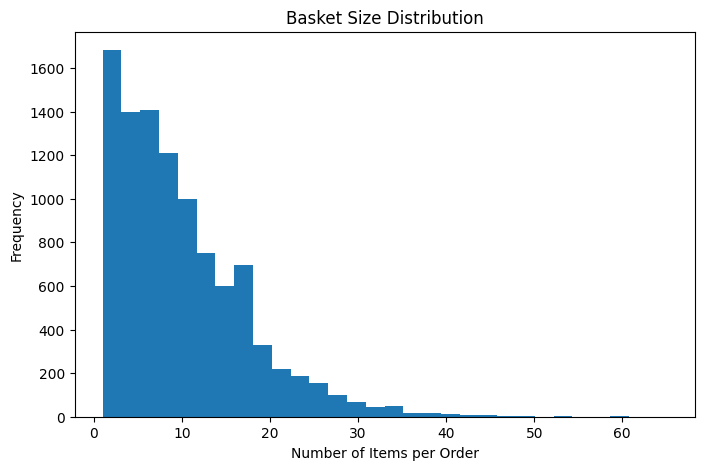

In [42]:
# basket size
basket_size = final_df.groupby('order_id')['product_id'].count()
basket_size.plot.hist(bins=30, figsize=(8,5), title='Basket Size Distribution')
plt.xlabel('Number of Items per Order')
plt.show()

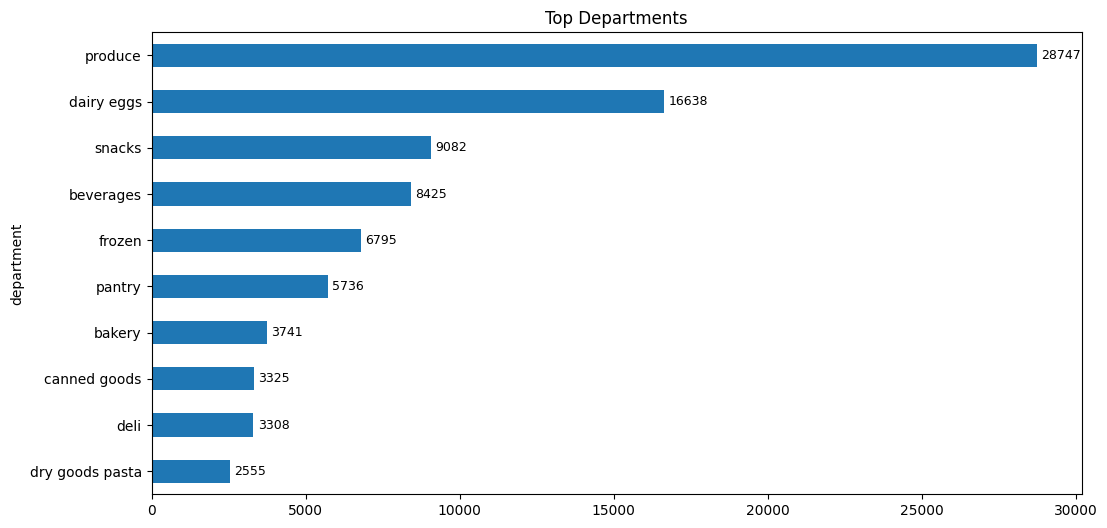

In [43]:
# top department

ax = final_df['department'].value_counts().head(10).plot(kind='barh', title='Top Departments' , figsize=(12,6))
ax.bar_label(ax.containers[0], padding=3, fontsize=9)
plt.gca().invert_yaxis()
plt.show()


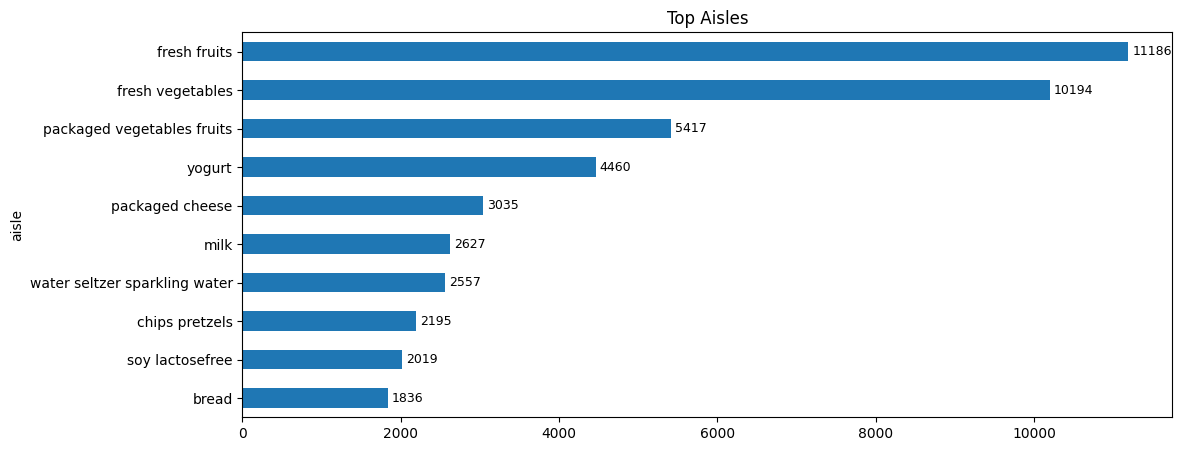

In [44]:
# top aisles
ax = final_df['aisle'].value_counts().head(10).plot(kind='barh', title='Top Aisles', figsize=(12,5))
ax.bar_label(ax.containers[0], padding=3, fontsize=9)
plt.gca().invert_yaxis()
plt.show()


In [45]:
final_df.to_csv('final_instacart_data.csv', index=False)

